# PCA
reference [PCA](http://darkpgmr.tistory.com/110)

# PCA proof
The project of $x$ on $e$  
$x$ is the arbitrary data point($n\times 1$)
$e$ is the unit vector($n\times 1$)

$$|Proj_e(x)| = x^Te$$
$$\Sigma = E[(x-\mu)(x-\mu)^T]$$
$\Sigma$ is $n\times n$ matrix

$$\mu = E[x]$$

# PCA proof
The project of $x$ on $e$  
  
$x$ is the arbitrary data point($n\times 1$)  
$e$ is the unit vector($n\times 1$)  $e^Te = 1$ 

$$|Proj_e(x)| = x^Te$$
$$\Sigma = E[(x-\mu)(x-\mu)^T]$$
$\Sigma$ is $n\times n$ matrix

$$\mu = E[x]$$

Projection domain mean $\mu_0$
$$\mu_0=E[x^Te]=E[x^T]e=\mu^Te$$
Projection domain covariance $\sigma_0$
$$\sigma_0 = E[(x^Te-\mu^Te)^2]=E[((x^T-\mu^T)e)^T((x^T-\mu^T)e)]$$  
  
$$=E[e^T(x-\mu)(x-\mu)^Te)]$$
  
$$=e^TE[(x-\mu)(x-\mu)^T)]e=e^T\Sigma e$$


$\Sigma$ is a positive definite symmetric matrix  
$\Sigma = PDP^T$(but, $D$ is a digonal matrix $PP^T=I$)  
$$\sigma_0 =(P^Te)^TD(P^Te)$$
  
let $z = P^Te$. Then, $z^Tz= e^TPP^Te = e^TIe = e^Te = 1$

$$\sigma_0 = z^TDz $$
maximum when $z=(1,0,\cdots,0)^T$
$$P^Te = (1,0,\cdots,0)^T $$
$$e = P(1,0,\cdots, 0)^T $$
$$\Sigma e = PDP^T P(1,0,\cdots, 0)^T = PD(1,0,\cdots,0)^T = P(\lambda,0,\cdots,0)^T=\lambda e $$

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data distribution

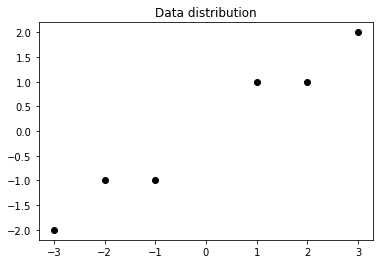

In [2]:
data=np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
for i in range(len(data)):
    plt.plot(data[i][0],data[i][1],'ko')
plt.title('Data distribution')
plt.show()

# Numpy usage

In [3]:
w, v = np.linalg.eig(np.cov(data.T)) # w : eigen vlaue v : eigen vector
print("The variance ratio of each component = {}".format(w/np.sum(w)))
print("Components of PCA : {}, {}".format(v.T[0], v.T[1]))

The variance ratio of each component = [ 0.99244289  0.00755711]
Components of PCA : [ 0.83849224  0.54491354], [-0.54491354  0.83849224]


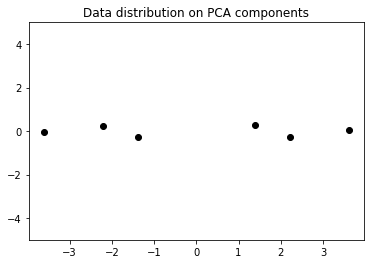

In [4]:
transformed_data = []
for i in range(len(data)):
    transformed_data.append([np.dot(data[i], v.T[0]), np.dot(data[i], v.T[1])])
transformed_data = np.array(transformed_data)
for i in range(len(transformed_data)):
    plt.plot(transformed_data[i][0],transformed_data[i][1],'ko')

plt.title('Data distribution on PCA components')    
plt.ylim(ymax = 5, ymin = -5)
plt.show()

# Sklearn libray usage

# PCA implementation
1. PCA components(eigen vectors of covariance matrix) 
    * There are orthogonal
2. PCA.explained_variance_ratio(high variance => major principal components

In [5]:
pca=PCA(n_components=2)
pca.fit(data)
print("Components of PCA : {},{}".format(pca.components_[0],pca.components_[1]))
print("The variance ratio of each component={}".format(pca.explained_variance_ratio_))

Components of PCA : [-0.83849224 -0.54491354],[ 0.54491354 -0.83849224]
The variance ratio of each component=[ 0.99244289  0.00755711]


## transformed_data
1. the poisition of points on the pca_components axis
2. ** sum for every k 
      **transformed_data(i)(k)*pca.components(k) (which makes original points (i) )

[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


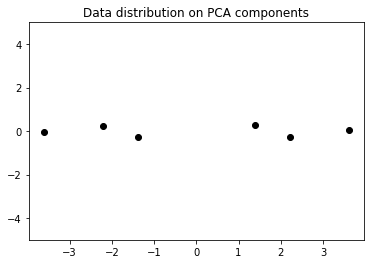

In [6]:
transformed_data=pca.transform(data)
print(transformed_data)
for i in range(len(transformed_data)):
    plt.plot(transformed_data[i][0],transformed_data[i][1], 'ko')

plt.title('Data distribution on PCA components')    
plt.ylim(ymax = 5, ymin = -5)
plt.show()

Data restoration =(-1.0,-1.0)
Originl data =(-1,-1)
Data restoration =(-2.0,-1.0)
Originl data =(-2,-1)
Data restoration =(-3.0,-2.0)
Originl data =(-3,-2)
Data restoration =(1.0,1.0)
Originl data =(1,1)
Data restoration =(2.0,1.0)
Originl data =(2,1)
Data restoration =(3.0,2.0)
Originl data =(3,2)


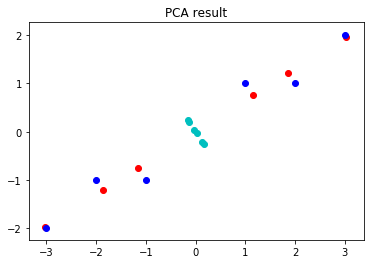

In [7]:
plt.cla()
for ii,jj in zip(transformed_data, data):
    plt.scatter(pca.components_[0][0]*ii[0],pca.components_[0][1]*ii[0],color="r")
    plt.scatter(pca.components_[1][0]*ii[1],pca.components_[1][1]*ii[1],color="c")
    print("Data restoration =({},{})".format(pca.components_[0][0]*ii[0]+pca.components_[1][0]*ii[1],pca.components_[0][1]*ii[0]+pca.components_[1][1]*ii[1]))
    print("Originl data =({},{})".format(jj[0],jj[1]))
    plt.scatter(jj[0],jj[1],color="b")
plt.title("PCA result")
plt.show()

# How about PCA_components smaller than dimension of vector
1. ** pca=PCA(n_components=k) ** k is the number of primitive vectors
2. **transform(data) **change data to the axies of pca.components 

In [8]:
data=np.array([[-1, -1, -2],[ -1, -3, -2], [1, 1, 5], [1, 3, 2]])
pca=PCA(n_components=2)
pca.fit(data)
print("PCA(n_components=2) result")
print("Components of PCA : {},{}".format(pca.components_[0],pca.components_[1]))
print("The variance ratio of each component={}".format(pca.explained_variance_ratio_))

print("Distribution of data on PCA components axes : {}".format(pca.transform(data)))
pca2=PCA(n_components=3)
pca2.fit(data)
print("PCA(n_components=3) result")
print("Components of PCA : {},{}".format(pca2.components_[0],pca2.components_[1]))
print("The variance ratio of each component={}".format(pca2.explained_variance_ratio_))
print("Distribution of data on PCA components axes : {}".format(pca2.transform(data)))

PCA(n_components=2) result
Components of PCA : [ 0.27446624  0.54513916  0.79214366],[ 0.05130266  0.81430487 -0.57816574]
The variance ratio of each component=[ 0.87892428  0.11938379]
Distribution of data on PCA components axes : [[-2.99800046  0.72434824]
 [-4.08827879 -0.90426149]
 [ 4.18621596 -1.59159685]
 [ 2.9000633   1.7715101 ]]
PCA(n_components=3) result
Components of PCA : [ 0.27446624  0.54513916  0.79214366],[ 0.05130266  0.81430487 -0.57816574]
The variance ratio of each component=[ 0.87892428  0.11938379  0.00169193]
Distribution of data on PCA components axes : [[-2.99800046  0.72434824  0.22318789]
 [-4.08827879 -0.90426149 -0.17546421]
 [ 4.18621596 -1.59159685  0.07011026]
 [ 2.9000633   1.7715101  -0.11783394]]
